In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("3-customersatisfaction.csv")

In [4]:
df

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365
...,...,...,...
95,95,2.055072,8.686851
96,96,0.864149,2.901486
97,97,-1.586101,0.786207
98,98,1.558528,5.447475


In [5]:
df.drop("Unnamed: 0", axis=1, inplace= True)

In [6]:
df

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365
...,...,...
95,2.055072,8.686851
96,0.864149,2.901486
97,-1.586101,0.786207
98,1.558528,5.447475


In [7]:
df.describe()

,Customer Satisfaction,Incentive
count,100.000000,100.000000
mean,-0.005427,3.445220
std,1.721792,2.911818
min,-2.992863,-1.068081
25%,-1.431357,1.471341
50%,0.109167,2.748839
75%,1.421119,4.739113
max,2.986736,11.000056


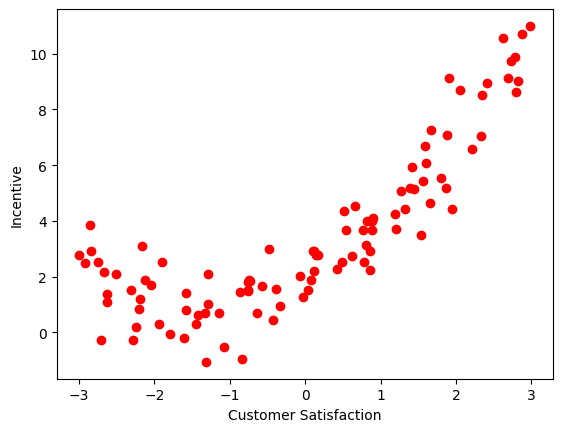

In [8]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color="r")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [9]:
#dependent and independent features
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [12]:
#train - test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 15)

In [19]:
scaler = StandardScaler()

In [20]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
regression = LinearRegression()

In [23]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = regression.predict(X_test)

In [25]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [26]:
score = r2_score(y_test, y_pred)

In [27]:
score

0.2705652535622246

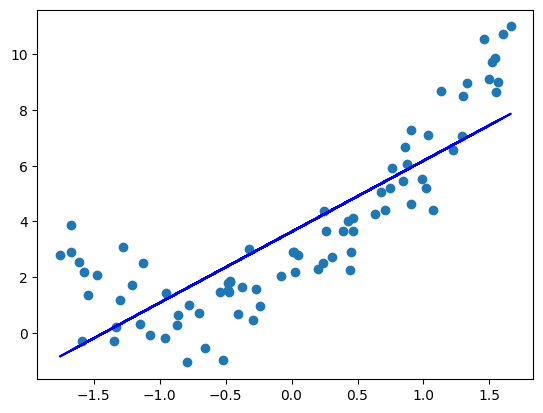

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color="b")
plt.show()

In [31]:
poly = PolynomialFeatures()

In [32]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [33]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7685687698788558


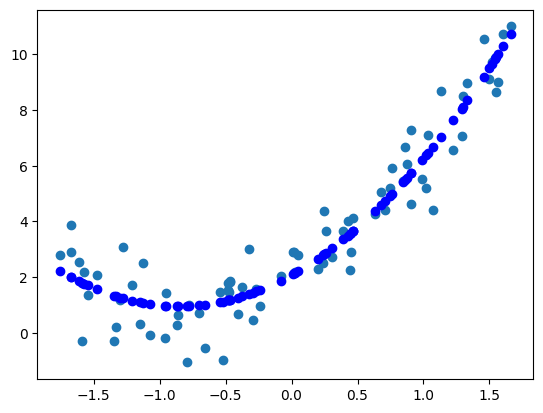

In [38]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color="b")
plt.show()

In [41]:
# new data
newdf = pd.read_csv("3-newdatas.csv")

In [42]:
newdf

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [43]:
newdf.rename(columns= {"0" : "Customer Satisfaction"}, inplace = True)

In [44]:
newdf

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [49]:
X_new = newdf[["Customer Satisfaction"]]

In [50]:
X_new = scaler.fit_transform(X_new)

In [51]:
X_new_poly =poly.transform(X_new)

In [52]:
y_new = regression.predict(X_new_poly)

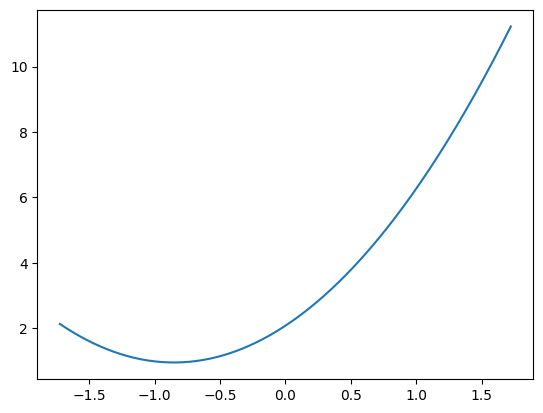

In [53]:
plt.plot(X_new, y_new)
plt.show()

In [54]:
# PİPELİNE

In [57]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standart_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(score)

In [58]:
poly_regression(1)

0.2705652535622244


In [59]:
poly_regression(2)

0.7685687698788558


In [60]:
poly_regression(3)

0.7573443621401048
